# 01/03/2022

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

# Let us Import and Explore the Dataset

In [2]:
data = pd.read_csv("housing data.csv")

In [3]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [4]:
data.tail()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125
1417,1418,5,1965,1256,SBrkr,1256,1,Attchd,1,276,NaN,NaN,147500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


From above Description, we get a hint of outliers in cloumns like TotalBsmtSF, GrLivArea, GarageArea, SalePrice

In [7]:
data.describe(include='object')

,Electrical,GarageType,Fence,MiscFeature
count,1417,1275,270,52
unique,5,6,4,4
top,SBrkr,Attchd,MnPrv,Shed
freq,1300,800,148,47


In [8]:
data.corr()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.029188,-0.017960,-0.019396,0.002991,-0.000113,0.015633,0.014457,-0.029967
OverallQual,-0.029188,1.000000,0.584692,0.545747,0.592881,0.550112,0.609104,0.567796,0.791478
YearBuilt,-0.017960,0.584692,1.000000,0.396971,0.204757,0.478441,0.550275,0.492807,0.528006
TotalBsmtSF,-0.019396,0.545747,0.396971,1.000000,0.456365,0.326705,0.442614,0.495600,0.619852
GrLivArea,0.002991,0.592881,0.204757,0.456365,1.000000,0.626942,0.472139,0.470736,0.709503
FullBath,-0.000113,0.550112,0.478441,0.326705,0.626942,1.000000,0.473365,0.408453,0.562269
GarageCars,0.015633,0.609104,0.550275,0.442614,0.472139,0.473365,1.000000,0.884674,0.647676
GarageArea,0.014457,0.567796,0.492807,0.495600,0.470736,0.408453,0.884674,1.000000,0.627264
SalePrice,-0.029967,0.791478,0.528006,0.619852,0.709503,0.562269,0.647676,0.627264,1.000000


<AxesSubplot:>

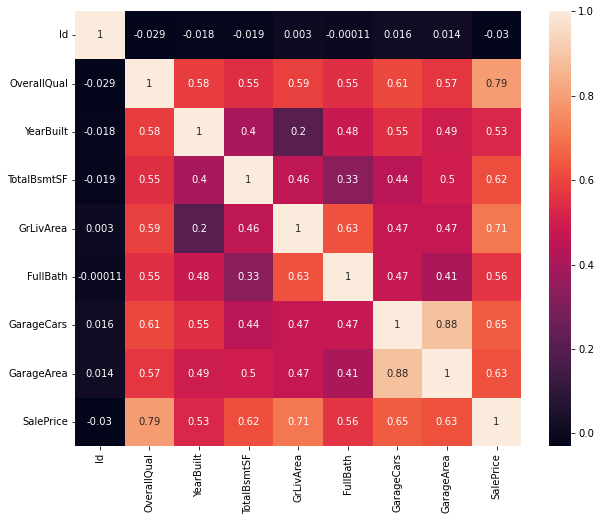

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

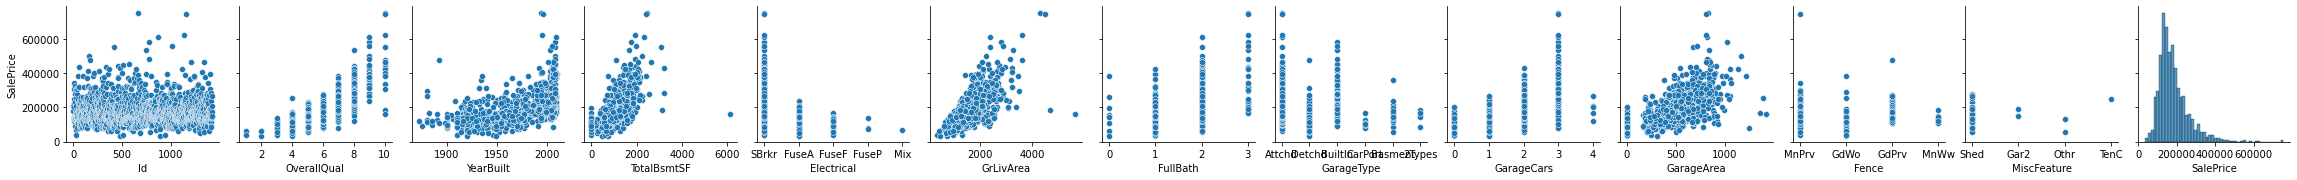

In [10]:
sns.pairplot(x_vars=data.columns,y_vars=['SalePrice'], data=data)
plt.show()

In [11]:
data.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical',
       'GrLivArea', 'FullBath', 'GarageType', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature', 'SalePrice'],
      dtype='object')

# Univariate and Bivariate Analysis

Skewness 1.8646120239750106
Kurtosis 6.432852054835754


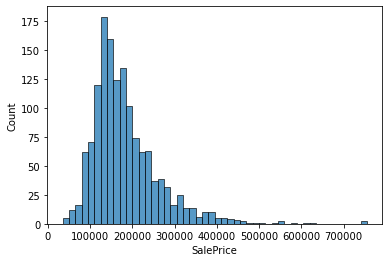

In [12]:
sns.histplot(data['SalePrice'])
print('Skewness', data['SalePrice'].skew())
print('Kurtosis', data['SalePrice'].kurt())
plt.show()
# This is Count VS bins

<AxesSubplot:ylabel='Density'>

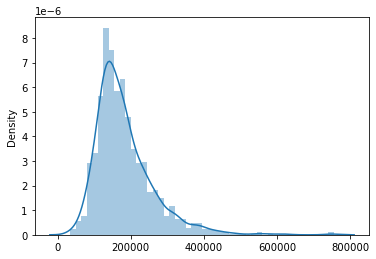

In [13]:
sns.distplot(x=data['SalePrice'])        # This is Density VS bins

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

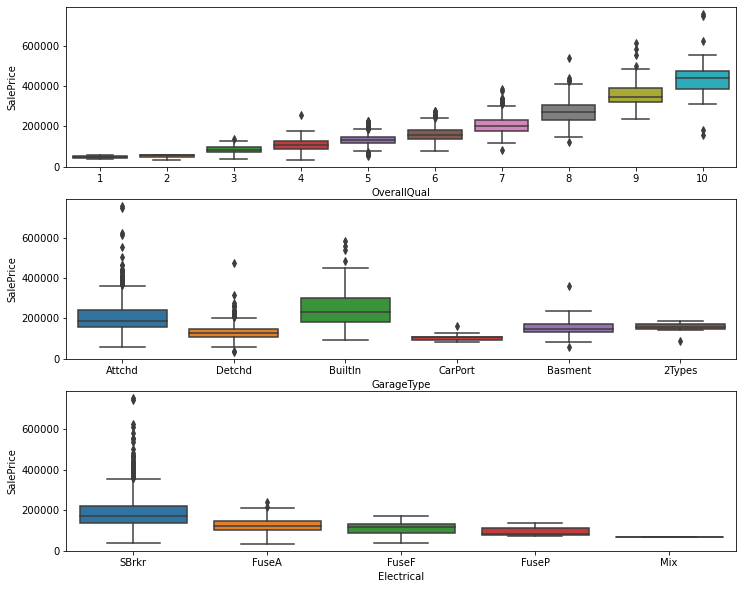

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.boxplot(y= data['SalePrice'], x=data['OverallQual'])
plt.subplot(3,1,2)
sns.boxplot(y= data['SalePrice'], x=data['GarageType'])
plt.subplot(3,1,3)
sns.boxplot(y= data['SalePrice'], x=data['Electrical'])

# Performing Chi Square Test on Overall Quality Data

In [15]:
stat.chisquare(data['OverallQual'])

Power_divergenceResult(statistic=445.1068050749712, pvalue=1.0)

In [16]:
price_a=data[data['OverallQual']<=5]['SalePrice']

In [17]:
price_b=data[data['OverallQual']>5]['SalePrice']

In [18]:
from statsmodels.stats.weightstats import ztest

In [19]:
z_val,p_val=ztest(x1=price_a, x2=price_b)

In [20]:
print('Z value=',z_val)
print('P value=',p_val)

Z value= -23.626614342802807
P value= 2.0535400662857033e-123


In [21]:
stat.chisquare(data['Id'])     # done by me. Check again

Power_divergenceResult(statistic=334884.3333333333, pvalue=0.0)

In [22]:
price_a=data[data['Id']<=5]['SalePrice']

In [23]:
price_b=data[data['Id']>5]['SalePrice']

In [24]:
from statsmodels.stats.weightstats import ztest

In [25]:
z_val,p_val=ztest(x1=price_a, x2=price_b)

In [26]:
print('Z value=',z_val)
print('P value=',p_val)

Z value= 0.5211546136221337
P value= 0.6022590684045321


# 03/03/2022

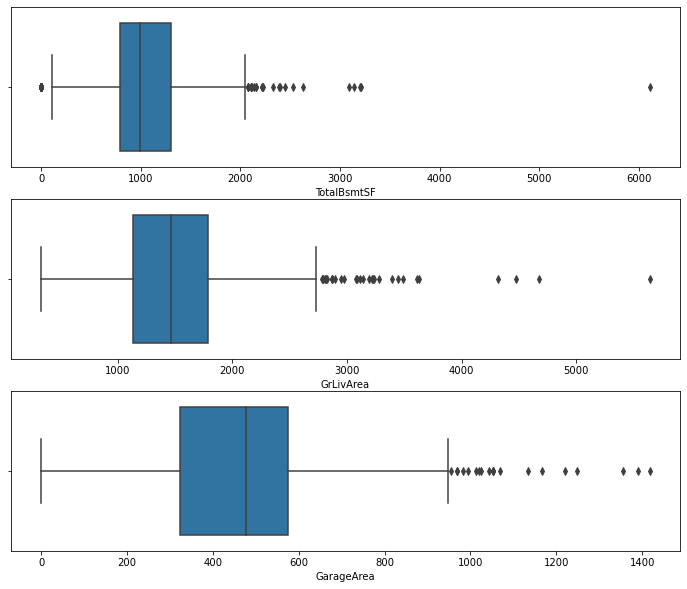

In [27]:
# Box Plot for columns with possible outliers
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.boxplot(data['TotalBsmtSF'])
plt.subplot(3,1,2)
sns.boxplot(data['GrLivArea'])
plt.subplot(3,1,3)
sns.boxplot(data['GarageArea'])
plt.show()

# Missing Value Treatment

In [28]:
data.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [29]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [30]:
# Treating Missing Value in Electrical

In [31]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64


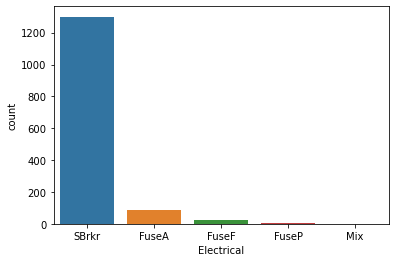

In [32]:
print(data['Electrical'].value_counts())
sns.countplot(data['Electrical'])
plt.show()

In [33]:
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

In [34]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [35]:
# Treating Missing Value in Garage Type

In [36]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [37]:
data[data['GarageArea']==0]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
46,47,4,1920,736,SBrkr,1452,2,NaN,0,0,NaN,NaN,113000
73,74,4,1968,1768,SBrkr,1768,2,NaN,0,0,NaN,NaN,136500
79,80,3,1915,1013,SBrkr,1526,1,NaN,0,0,MnPrv,NaN,85000
80,81,4,1994,990,SBrkr,990,1,NaN,0,0,NaN,NaN,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1311,8,1872,684,SBrkr,2358,2,NaN,0,0,NaN,NaN,122000
1366,1367,5,1985,833,SBrkr,833,1,NaN,0,0,MnPrv,NaN,112000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000


In [38]:
data['GarageType']=np.where(data['GarageArea']==0, 'NoGarage', data['GarageType'])

In [39]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,48,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1264,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,1318,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,1358,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [40]:
data.groupby(['GarageType','GarageCars'])['GarageArea'].median()

GarageType  GarageCars
2Types      2              750.0
            3              825.0
            4             1356.0
Attchd      1              299.0
            2              504.0
            3              822.0
            4              784.0
Basment     1              338.0
            2              525.0
BuiltIn     1              292.5
            2              474.0
            3              766.0
CarPort     1              294.0
            2              489.0
Detchd      1              277.5
            2              528.0
            3              840.0
            4              864.0
NoGarage    0                0.0
Name: GarageArea, dtype: float64

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

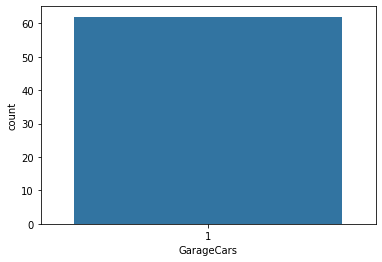

In [41]:
sns.countplot(x='GarageCars',data=data[data['GarageType'].isnull()])

In [42]:
data[data['GarageCars']==1]['GarageType'].value_counts()

Detchd     178
Attchd     105
BuiltIn      8
Basment      8
CarPort      3
Name: GarageType, dtype: int64

In [43]:
data['GarageType']=np.where(data['GarageType'].isnull(), 'Detchd' , data['GarageType'])

In [44]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [45]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
Electrical      0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageType      0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [46]:
# Since there are lot of missing values in MiscFeatures and Fence we have to delete them

In [47]:
data.drop(columns=['MiscFeature','Fence'], inplace=True)

In [48]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Id             0.0
OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

# Outlier Treatment

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

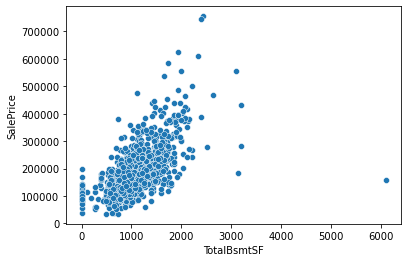

In [49]:
# First let us look at TotalBsmtSF

sns.scatterplot(y='SalePrice',x='TotalBsmtSF', data=data)

In [50]:
data[data['TotalBsmtSF']>6000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [51]:
data.drop([1260],axis=0,inplace=True)

In [52]:
data[data['TotalBsmtSF']>6000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

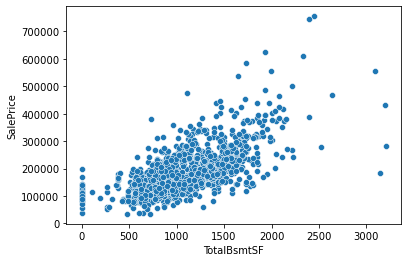

In [53]:
sns.scatterplot(y='SalePrice',x='TotalBsmtSF', data=data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

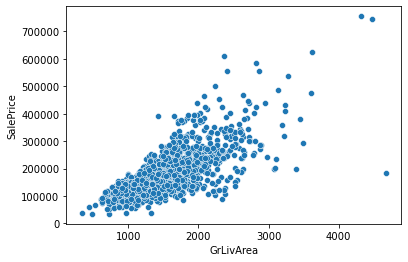

In [54]:
# First let us look at GrLivArea

sns.scatterplot(y='SalePrice',x='GrLivArea', data=data)

In [55]:
data[data['GrLivArea']>4000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [56]:
data.drop([500],axis=0,inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

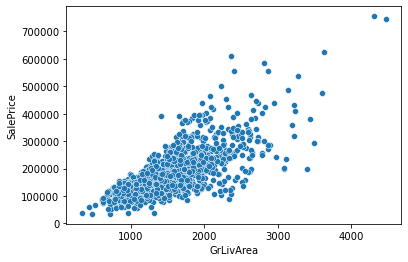

In [57]:
sns.scatterplot(y='SalePrice',x='GrLivArea', data=data)

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1416.0,709.257768,409.474995,1.0,354.75,709.5,1063.25,1418.0
OverallQual,1416.0,6.108757,1.379110,1.0,5.00,6.0,7.00,10.0
YearBuilt,1416.0,1971.550141,30.055196,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1416.0,1056.680791,412.794439,0.0,796.00,993.5,1302.00,3206.0
GrLivArea,1416.0,1514.504944,509.392098,334.0,1131.75,1467.0,1784.50,4476.0
FullBath,1416.0,1.564266,0.550073,0.0,1.00,2.0,2.00,3.0
GarageCars,1416.0,1.762712,0.755789,0.0,1.00,2.0,2.00,4.0
GarageArea,1416.0,471.659605,214.474979,0.0,323.50,478.0,576.00,1390.0
SalePrice,1416.0,182103.206921,80025.243732,34900.0,130000.00,164800.0,215000.00,755000.0


# Feature Selection

In [59]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125


In [60]:
del data['Id']
del data['GarageCars']     #This is removed due to multicollinearity

In [61]:
data.shape

(1416, 9)

# Feature Engineering

In [62]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageArea,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,548,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,460,181500
2,7,2001,920,SBrkr,1786,2,Attchd,608,223500
3,7,1915,756,SBrkr,1717,1,Detchd,642,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,460,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,500,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,252,266500
1416,5,1950,1078,FuseA,1078,1,Detchd,240,142125


In [63]:
data=pd.get_dummies(data)

In [64]:
data

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,2003,856,1710,2,548,208500,0,0,0,0,1,0,1,0,0,0,0,0
1,6,1976,1262,1262,2,460,181500,0,0,0,0,1,0,1,0,0,0,0,0
2,7,2001,920,1786,2,608,223500,0,0,0,0,1,0,1,0,0,0,0,0
3,7,1915,756,1717,1,642,140000,0,0,0,0,1,0,0,0,0,0,1,0
4,8,2000,1145,2198,2,836,250000,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,1647,2,460,175000,0,0,0,0,1,0,1,0,0,0,0,0
1414,6,1978,1542,2073,2,500,210000,0,0,0,0,1,0,1,0,0,0,0,0
1415,7,1941,1152,2340,2,252,266500,0,0,0,0,1,0,1,0,0,0,0,0
1416,5,1950,1078,1078,1,240,142125,1,0,0,0,0,0,0,0,0,0,1,0


In [65]:
data.shape

(1416, 19)

# Train Test Split

In [66]:
x=data.drop(columns=['SalePrice'])
y=data['SalePrice']

In [67]:
x

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,2003,856,1710,2,548,0,0,0,0,1,0,1,0,0,0,0,0
1,6,1976,1262,1262,2,460,0,0,0,0,1,0,1,0,0,0,0,0
2,7,2001,920,1786,2,608,0,0,0,0,1,0,1,0,0,0,0,0
3,7,1915,756,1717,1,642,0,0,0,0,1,0,0,0,0,0,1,0
4,8,2000,1145,2198,2,836,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,1647,2,460,0,0,0,0,1,0,1,0,0,0,0,0
1414,6,1978,1542,2073,2,500,0,0,0,0,1,0,1,0,0,0,0,0
1415,7,1941,1152,2340,2,252,0,0,0,0,1,0,1,0,0,0,0,0
1416,5,1950,1078,1078,1,240,1,0,0,0,0,0,0,0,0,0,1,0


In [68]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1413    175000
1414    210000
1415    266500
1416    142125
1417    147500
Name: SalePrice, Length: 1416, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [71]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1132, 18) (284, 18) (1132,) (284,)


In [72]:
# Splitting the data again to check if the accuracy remains same or different

In [73]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,train_size=0.8,random_state=3)

In [74]:
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(1132, 18) (284, 18) (1132,) (284,)


# Linear Regression Model

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model=LinearRegression()

In [77]:
model.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred=model.predict(x_test)

In [79]:
pd.DataFrame({'Actual Y':y_test, 'Predicted Y':y_pred, 'Residual':(y_test-y_pred)}).head(10)

,Actual Y,Predicted Y,Residual
235,145000,151291.236748,-6291.236748
465,156000,136850.586132,19149.413868
1146,392500,256326.309100,136173.690900
1119,201800,207551.410291,-5751.410291
1060,129000,105830.453215,23169.546785
983,203000,220484.149131,-17484.149131
561,369900,315689.916828,54210.083172
65,244000,292946.478912,-48946.478912
1215,171750,212261.817437,-40511.817437
1093,259000,235612.140621,23387.859379


In [80]:
model.coef_      #this include the train data only

array([ 1.73036741e+04,  3.74504090e+02,  4.63635479e+01,  6.31703948e+01,
       -7.53260162e+03,  6.10794491e+01,  9.22591156e+03,  1.68154350e+04,
       -3.14746052e+02, -3.37554829e+04,  8.02888233e+03, -4.89414139e+04,
        3.08875530e+03,  1.46119289e+03,  1.99210051e+04, -5.69022948e+03,
        7.62631669e+03,  2.25343735e+04])

In [81]:
model.intercept_

-838139.194672611

# Model Validation

In [82]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [83]:
def validation(y_test,y_pred):
    print('MAPE =', mean_absolute_percentage_error(y_test,y_pred))
    print('RMSE =', mean_squared_error(y_test,y_pred)**0.5)
    print('MSE =', mean_squared_error(y_test,y_pred))
    print('R Square Value =', r2_score(y_test,y_pred))

In [84]:
validation(y_test,y_pred)

MAPE = 0.1441984759093716
RMSE = 32549.7904029185
MSE = 1059488855.2739253
R Square Value = 0.8226944375206537


In [85]:
model.score(x,y)

0.8233557807703689

In [86]:
r2=r2_score(y_test,y_pred)
n=x_test.shape[0]
k=x_test.shape[1]
Adj_r2=1-(((n-1)/(n-k-1))*(1-r2))
print('Adjusted R square is', Adj_r2)

Adjusted R square is 0.8106510408239435


# Statistical Model

In [87]:
import statsmodels.api as sm
model_sts=sm.OLS(y_train,x_train)       #this includes the complete dataset
result=model_sts.fit()

In [88]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     324.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:58:08   Log-Likelihood:                -13414.
No. Observations:                1132   AIC:                         2.686e+04
Df Residuals:                    1115   BIC:                         2.695e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
OverallQual           1.73e+04   1

# Checking the Model for overfitting

In [89]:
y_train_pred=model.predict(x_train)

In [90]:
validation(y_train,y_train_pred)    # Train Accuracy

MAPE = 0.14358633145048072
RMSE = 33885.65431508186
MSE = 1148237568.3612258
R Square Value = 0.8233860120241576


In [91]:
validation(y_test,y_pred)       # Test Accuracy

MAPE = 0.1441984759093716
RMSE = 32549.7904029185
MSE = 1059488855.2739253
R Square Value = 0.8226944375206537


## Ridge and Lasso Regression

In [92]:
from sklearn.linear_model import Ridge, Lasso

In [93]:
ridge_model= Ridge(alpha=0.1)

In [94]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [95]:
y_pred_l2=ridge_model.predict(x_test)

In [96]:
validation(y_test,y_pred_l2)

MAPE = 0.14418301481599258
RMSE = 32544.3411335985
MSE = 1059134139.8200314
R Square Value = 0.8227537991861963


In [97]:
# Lasso Model

lasso_model=Lasso(alpha=0.1)

In [98]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [99]:
y_pred_l1=lasso_model.predict(x_test)

In [100]:
validation(y_test,y_pred_l1)

MAPE = 0.14419818649767324
RMSE = 32549.68466907497
MSE = 1059481972.0562142
R Square Value = 0.822695589427804


# Randomized Search CV and Grid Search CV (CV= Cross Validation)

In [101]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [102]:
params={'alpha':[0.001,0.01,0.1,1,10,100,1000]}

In [103]:
gscv=GridSearchCV(estimator=Ridge(), param_grid=params, scoring='r2', verbose=3,cv=2)

In [104]:
gscv.fit(x_train,y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2] END .......................alpha=0.001;, score=0.823 total time=   0.0s
[CV 2/2] END .......................alpha=0.001;, score=0.811 total time=   0.0s
[CV 1/2] END ........................alpha=0.01;, score=0.823 total time=   0.0s
[CV 2/2] END ........................alpha=0.01;, score=0.811 total time=   0.0s
[CV 1/2] END .........................alpha=0.1;, score=0.823 total time=   0.0s
[CV 2/2] END .........................alpha=0.1;, score=0.811 total time=   0.0s
[CV 1/2] END ...........................alpha=1;, score=0.824 total time=   0.0s
[CV 2/2] END ...........................alpha=1;, score=0.813 total time=   0.0s
[CV 1/2] END ..........................alpha=10;, score=0.824 total time=   0.0s
[CV 2/2] END ..........................alpha=10;, score=0.814 total time=   0.0s
[CV 1/2] END .........................alpha=100;, score=0.822 total time=   0.0s
[CV 2/2] END .........................alpha=100;,

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2', verbose=3)

In [105]:
gscv.best_estimator_

Ridge(alpha=10)

In [106]:
model_gscv_l2=gscv.best_estimator_

In [107]:
model_gscv_l2.fit(x_train,y_train)

Ridge(alpha=10)

In [108]:
y_pred_gscv_l2=model_gscv_l2.predict(x_test)

In [109]:
validation(y_test,y_pred_gscv_l2)

MAPE = 0.14594881911584248
RMSE = 32701.433979059013
MSE = 1069383784.2867554
R Square Value = 0.821038520192614


In [110]:
# Lasso Using GSCV

In [111]:
gscv=GridSearchCV(estimator=Lasso(),param_grid=params,scoring='r2',verbose=3,cv=2)

In [112]:
gscv.fit(x_train,y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2] END .......................alpha=0.001;, score=0.823 total time=   0.0s
[CV 2/2] END .......................alpha=0.001;, score=0.811 total time=   0.0s
[CV 1/2] END ........................alpha=0.01;, score=0.823 total time=   0.0s
[CV 2/2] END ........................alpha=0.01;, score=0.811 total time=   0.0s
[CV 1/2] END .........................alpha=0.1;, score=0.823 total time=   0.0s
[CV 2/2] END .........................alpha=0.1;, score=0.811 total time=   0.0s
[CV 1/2] END ...........................alpha=1;, score=0.824 total time=   0.0s
[CV 2/2] END ...........................alpha=1;, score=0.811 total time=   0.0s
[CV 1/2] END ..........................alpha=10;, score=0.824 total time=   0.0s
[CV 2/2] END ..........................alpha=10;, score=0.812 total time=   0.0s
[CV 1/2] END .........................alpha=100;, score=0.824 total time=   0.0s
[CV 2/2] END .........................alpha=100;,

GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2', verbose=3)

In [113]:
gscv.best_estimator_

Lasso(alpha=100)

In [114]:
y_pred_gscv_l1=gscv.predict(x_test)

In [115]:
validation(y_test,y_pred_gscv_l1)

MAPE = 0.14516632422864978
RMSE = 32608.748501061556
MSE = 1063330478.8054844
R Square Value = 0.8220515414508118


In [116]:
# RSCV
from scipy.stats import randint, uniform, loguniform

In [117]:
params_rscv={'alpha':loguniform(0.001,1000)}

In [118]:
rscv=RandomizedSearchCV(estimator=Ridge(), param_distributions=params_rscv,scoring='r2',verbose=3,cv=2)

In [119]:
rscv.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END ...........alpha=983.0480499093812;, score=0.804 total time=   0.0s
[CV 2/2] END ...........alpha=983.0480499093812;, score=0.794 total time=   0.0s
[CV 1/2] END .........alpha=0.20060267286586514;, score=0.824 total time=   0.0s
[CV 2/2] END .........alpha=0.20060267286586514;, score=0.812 total time=   0.0s
[CV 1/2] END .........alpha=0.02786559118665081;, score=0.823 total time=   0.0s
[CV 2/2] END .........alpha=0.02786559118665081;, score=0.811 total time=   0.0s
[CV 1/2] END ..........alpha=0.0416773395969417;, score=0.823 total time=   0.0s
[CV 2/2] END ..........alpha=0.0416773395969417;, score=0.811 total time=   0.0s
[CV 1/2] END ..........alpha=2.0380454903076206;, score=0.824 total time=   0.0s
[CV 2/2] END ..........alpha=2.0380454903076206;, score=0.813 total time=   0.0s
[CV 1/2] END .......alpha=0.0038545013602776057;, score=0.823 total time=   0.0s
[CV 2/2] END .......alpha=0.0038545013602776057;

RandomizedSearchCV(cv=2, estimator=Ridge(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022A18CA1A90>},
                   scoring='r2', verbose=3)

In [120]:
rscv.best_estimator_

Ridge(alpha=2.0380454903076206)

In [121]:
y_pred_rscv_l2=rscv.predict(x_test)

In [122]:
validation(y_test,y_pred_rscv_l2)

MAPE = 0.1446134801771004
RMSE = 32546.115421530238
MSE = 1059249629.0315683
R Square Value = 0.8227344720554672


In [123]:
# Lasso using RSCV

In [124]:
rscv=RandomizedSearchCV(estimator=Lasso(), param_distributions=params_rscv,scoring='r2',verbose=3,cv=2)

In [125]:
rscv.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END .......alpha=0.0023764648947727477;, score=0.823 total time=   0.0s
[CV 2/2] END .......alpha=0.0023764648947727477;, score=0.811 total time=   0.0s
[CV 1/2] END ..........alpha=4.2633714695380265;, score=0.824 total time=   0.0s
[CV 2/2] END ..........alpha=4.2633714695380265;, score=0.812 total time=   0.0s
[CV 1/2] END ..........alpha=11.519729155176606;, score=0.824 total time=   0.0s
[CV 2/2] END ..........alpha=11.519729155176606;, score=0.812 total time=   0.0s
[CV 1/2] END ...........alpha=0.686932324401273;, score=0.824 total time=   0.0s
[CV 2/2] END ...........alpha=0.686932324401273;, score=0.811 total time=   0.0s
[CV 1/2] END ..........alpha=60.153110969919496;, score=0.824 total time=   0.0s
[CV 2/2] END ..........alpha=60.153110969919496;, score=0.813 total time=   0.0s
[CV 1/2] END .........alpha=0.05150612646609965;, score=0.823 total time=   0.0s
[CV 2/2] END .........alpha=0.05150612646609965;

RandomizedSearchCV(cv=2, estimator=Lasso(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022A18CA1A90>},
                   scoring='r2', verbose=3)

In [126]:
rscv.best_estimator_

Lasso(alpha=60.153110969919496)

In [127]:
y_pred_rscv_l1=rscv.predict(x_test)

In [128]:
validation(y_test,y_pred_rscv_l1)

MAPE = 0.14432581680938436
RMSE = 32514.158888113525
MSE = 1057170528.2014917
R Square Value = 0.8230824097806193


# DECISION TREE (Regressor)

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2,3,4,5,6,7,8]}

In [130]:
gscv= GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params, scoring='r2',verbose=3,cv=2)

In [131]:
gscv.fit(x_train,y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2] END .......................max_depth=2;, score=0.574 total time=   0.0s
[CV 2/2] END .......................max_depth=2;, score=0.599 total time=   0.0s
[CV 1/2] END .......................max_depth=3;, score=0.675 total time=   0.0s
[CV 2/2] END .......................max_depth=3;, score=0.691 total time=   0.0s
[CV 1/2] END .......................max_depth=4;, score=0.723 total time=   0.0s
[CV 2/2] END .......................max_depth=4;, score=0.760 total time=   0.0s
[CV 1/2] END .......................max_depth=5;, score=0.737 total time=   0.0s
[CV 2/2] END .......................max_depth=5;, score=0.803 total time=   0.0s
[CV 1/2] END .......................max_depth=6;, score=0.649 total time=   0.0s
[CV 2/2] END .......................max_depth=6;, score=0.750 total time=   0.0s
[CV 1/2] END .......................max_depth=7;, score=0.651 total time=   0.0s
[CV 2/2] END .......................max_depth=7;,

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]}, scoring='r2',
             verbose=3)

In [132]:
gscv.best_params_

{'max_depth': 5}

In [133]:
model_dt= DecisionTreeRegressor(**gscv.best_params_)

In [134]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [135]:
y_pred_dt=model_dt.predict(x_test)

In [136]:
pd.DataFrame({'Actual':y_test,'Predicted_LR':y_pred,'Predicted_DTR':y_pred_dt})

,Actual,Predicted_LR,Predicted_DTR
235,145000,151291.236748,156364.285714
465,156000,136850.586132,149036.904762
1146,392500,256326.309100,254312.500000
1119,201800,207551.410291,181462.916667
1060,129000,105830.453215,119816.475000
...,...,...,...
846,132250,124419.575655,149036.904762
1225,128900,120149.706154,134444.132075
1077,205000,209856.999050,181462.916667
1056,197000,224938.458681,274567.592593


In [137]:
validation(y_test,y_pred_dt)

MAPE = 0.14725350864320477
RMSE = 36464.19239056926
MSE = 1329637326.696449
R Square Value = 0.7774850646800852


In [138]:
validation(y_test,y_pred)

MAPE = 0.1441984759093716
RMSE = 32549.7904029185
MSE = 1059488855.2739253
R Square Value = 0.8226944375206537


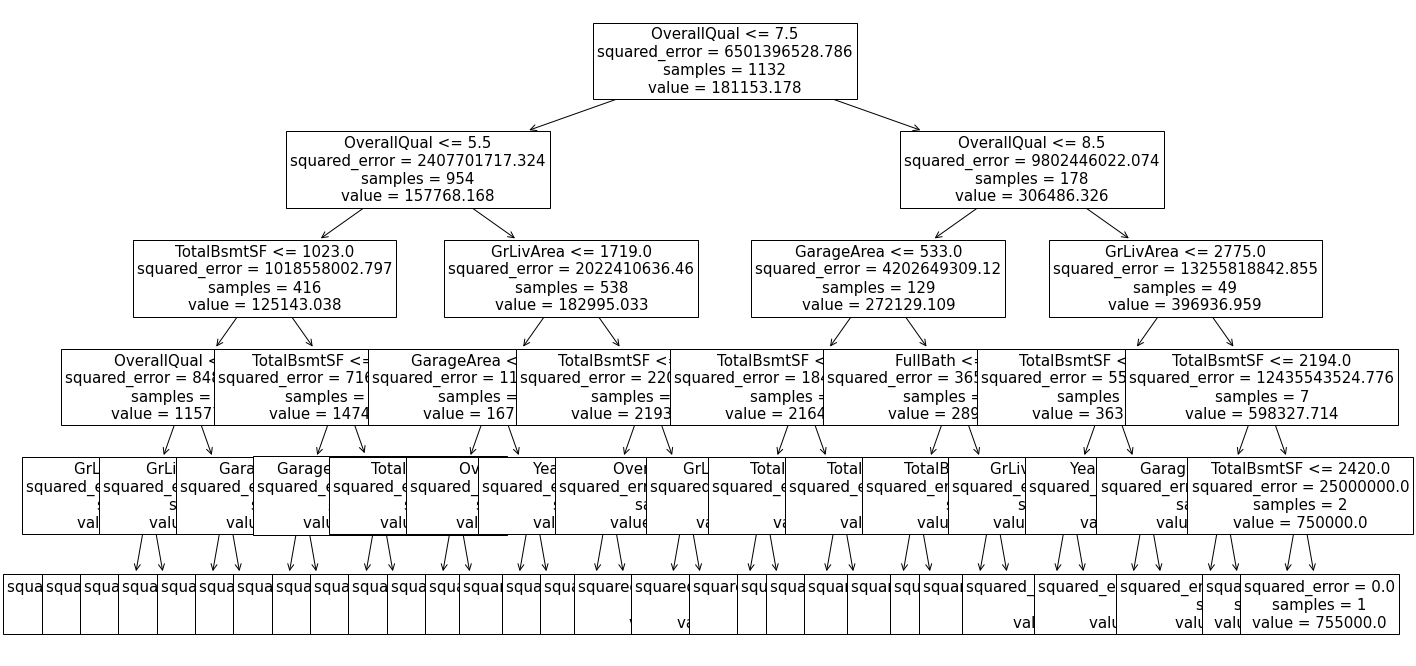

In [139]:
from sklearn import tree
plt.figure(figsize=(22,12))
tree.plot_tree(model_dt, feature_names=x_train.columns, fontsize=15)
plt.show()

# RANDOM FOREST (ENSEMBLE MODEL - BAGGING)

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
params = {'n_estimators':[80,100,120,130,140], 'max_depth':[5,6,7,8,9]}

gscv= GridSearchCV(estimator=RandomForestRegressor(),param_grid=params, scoring='r2' , verbose=1, cv=2)

In [142]:
gscv.fit(x,y)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [80, 100, 120, 130, 140]},
             scoring='r2', verbose=1)

In [143]:
gscv.best_params_

{'max_depth': 9, 'n_estimators': 120}

In [144]:
model_rf = RandomForestRegressor(**gscv.best_params_)

In [145]:
model_rf1 = RandomForestRegressor(**gscv.best_params_)

In [146]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=120)

In [147]:
model_rf1.fit(x_train1,y_train1)    #Training for different data

RandomForestRegressor(max_depth=9, n_estimators=120)

In [148]:
y_pred_rf=model_rf.predict(x_test)

In [149]:
y_pred_rf1=model_rf.predict(x_test1)

In [150]:
validation(y_pred,y_pred_rf)

MAPE = 0.10101489851315122
RMSE = 19978.271661335406
MSE = 399131338.5741174
R Square Value = 0.9238459525123345


In [151]:
validation(y_pred,y_pred_rf1)

MAPE = 0.5485789967883742
RMSE = 107581.50559715334
MSE = 11573780346.550335
R Square Value = -1.2082711452118478


In [152]:
r2=r2_score(y_test,y_pred_rf)
n=x_test.shape[0]
k=x_test.shape[1]
Adj_r2=1-(((n-1)/(n-k-1))*(1-r2))
print('Adjusted R square is', Adj_r2)

Adjusted R square is 0.8651881879252524


# ENSEMBLE MODEL (BOOSTING)

In [153]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

params = {'n_estimators':[80,100,120,130,140]}


In [154]:
gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(),
                       param_grid=params,
                       scoring='r2',
                       verbose=1,
                       cv=2)


In [155]:
gscv_ada.fit(x,y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=2, estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [80, 100, 120, 130, 140]},
             scoring='r2', verbose=1)

In [156]:
gscv_ada.best_params_

{'n_estimators': 100}

In [157]:
model_ada = AdaBoostRegressor(**gscv_ada.best_params_)

In [158]:
model_ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100)

In [159]:
y_pred_ada = model_ada.predict(x_test)

In [160]:
validation(y_pred,y_pred_ada)

MAPE = 0.1596547437542002
RMSE = 25902.867797961022
MSE = 670958560.1586461
R Square Value = 0.8719814629562374


# ADAboost with different depth

In [161]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

params = {'n_estimators':[80,100,120,130,140]}


In [162]:
ada= AdaBoostRegressor(DecisionTreeRegressor(max_depth=2))
gscv_ada = GridSearchCV(estimator=ada,
                       param_grid=params,
                       scoring='r2',
                       verbose=1,
                       cv=2)


In [163]:
gscv_ada.fit(x,y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=2,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2)),
             param_grid={'n_estimators': [80, 100, 120, 130, 140]},
             scoring='r2', verbose=1)

In [164]:
gscv_ada.best_params_

{'n_estimators': 80}

In [165]:
model_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=100)

In [166]:
model_ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  n_estimators=100)

In [167]:
model_ada.score(x_test,y_test)

0.7983501104073427

In [168]:
y_pred_ada = model_ada.predict(x_test)

In [169]:
validation(y_pred,y_pred_ada)

MAPE = 0.1755054328490544
RMSE = 28639.46779273111
MSE = 820219115.4508826
R Square Value = 0.8435026282539366


In [170]:
# Make bar chart for visualization

# Gradient boosting

In [171]:
params = {'learning_rate':[0.01,0.1,1],
         'n_estimators':[90,100,120,130],
         'max_depth':[5,6,7]}

In [172]:
gscv_gb = GridSearchCV(estimator=GradientBoostingRegressor(),
                       param_grid=params,
                       scoring='r2',
                       verbose=1,
                      cv=2)


In [173]:
gscv_gb.fit(x,y)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [90, 100, 120, 130]},
             scoring='r2', verbose=1)

In [174]:
gscv_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [175]:
model_gb=GradientBoostingRegressor(**gscv_gb.best_params_)

In [176]:
model_gb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5)

In [177]:
model_gb.score(x_test,y_test)

0.8766686342951243

In [178]:
y_pred_gb = model_gb.predict(x_test)

In [179]:
validation(y_test,y_pred_gb)

MAPE = 0.11202201299192652
RMSE = 27147.121482733353
MSE = 736966204.7982827
R Square Value = 0.8766686342951243


# XG Boost

In [180]:
from xgboost import XGBRegressor
params={'n_estimators':[100,120,140]}

In [181]:
xgb = XGBRegressor()

In [182]:
gscv_xgb = GridSearchCV(estimator=xgb,
                       param_grid= params,
                       scoring='r2',
                       verbose=1,
                       cv=2)

In [183]:
gscv_xgb.fit(x,y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'n_estimators': [100, 120, 140]}, scoring='r2',
             verbose=1)

In [184]:
gscv_xgb.best_params_

{'n_estimators': 100}

In [185]:
model_xgb = XGBRegressor(**gscv_xgb.best_params_)

In [186]:
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [187]:
y_pred_xgb = model_xgb.predict(x_test)

In [188]:
validation(y_test,y_pred_xgb)

MAPE = 0.12084038613972035
RMSE = 30398.61801283523
MSE = 924075977.0902705
R Square Value = 0.8453557957914707


## KNN

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler = StandardScaler()

In [191]:
x_train_s= scaler.fit_transform(x_train)

In [192]:
x_test_s= scaler.fit_transform(x_test)

In [193]:
from sklearn.neighbors import KNeighborsRegressor

In [194]:
knn = KNeighborsRegressor()

In [195]:
knn.fit(x_train_s,y_train)

KNeighborsRegressor()

In [196]:
knn.score(x_test_s,y_test)

0.7840865304178416

In [197]:
y_pred_knn = knn.predict(x_test_s)

In [198]:
validation(y_test,y_pred_knn)

MAPE = 0.12361627848522952
RMSE = 35919.21892298305
MSE = 1290190288.0371833
R Square Value = 0.7840865304178416


In [199]:
# Tuning n_neighbors

In [200]:
params={'n_neighbors':[7,9,11]}

In [201]:
gscv_knn = GridSearchCV(estimator=knn,
                       param_grid= params,
                       scoring='r2',
                       verbose=1,
                       cv=2)

In [202]:
gscv_knn.fit(x,y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [7, 9, 11]}, scoring='r2', verbose=1)

In [203]:
gscv_knn.best_params_

{'n_neighbors': 7}

In [204]:
model_knn = KNeighborsRegressor(**gscv_knn.best_params_)

In [205]:
model_knn.fit(x_train_s,y_train)

KNeighborsRegressor(n_neighbors=7)

In [206]:
y_pred_knn = model_knn.predict(x_test_s)

In [207]:
validation(y_test,y_pred_knn)

MAPE = 0.12268471490591117
RMSE = 36272.5387196748
MSE = 1315697065.1703076
R Square Value = 0.7798179687957802


## SVM Support Vector Mechanism  (SVR- Support Vector Regressor)

In [208]:
from sklearn.svm import SVR

In [209]:
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'C':[0.01,0.1],
         'gamma':[0.1,1,10],
         'degree':[3,4]}

In [210]:
gscv_svr = GridSearchCV(estimator= SVR(),
                       param_grid=params,
                       verbose=3,
                       scoring='r2',
                       cv=2)

In [211]:
gscv_svr.fit(x_train_s,y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=-0.079 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=-0.016 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=-0.080 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=-0.016 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=sigmoid;, score=-0.080 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=sigmoid;, score=-0.016 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=1, kernel=linear;, score=-0.079 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=1, kernel=linear;, score=-0.016 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=1, kernel=poly

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1], 'degree': [3, 4],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=3)

In [212]:
gscv_svr.best_params_

{'C': 0.01, 'degree': 3, 'gamma': 10, 'kernel': 'poly'}

In [213]:
model_svr=SVR(**gscv_svr.best_params_)

In [214]:
model_svr.fit(x_train_s,y_train)

SVR(C=0.01, gamma=10, kernel='poly')

In [215]:
y_pred_svr=model_svr.predict(x_test_s)

In [216]:
validation(y_pred_svr,y_test)

MAPE = 0.2485282901755068
RMSE = 37051.756711771886
MSE = 1372832675.4283328
R Square Value = 0.6559402737750775
